<a href="https://colab.research.google.com/github/ysoniwal/statistics/blob/main/00_statistics_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Height data to understand statistics and make some plots 
Data downloaded from [Kaggle](https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset?select=SOCR-HeightWeight.csv)


In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ysoniwal/statistics/main/SOCR-HeightWeight.csv")
df.drop("Index", axis = 1, inplace = True)
df.columns = ["height", "weight"]

In [ ]:
df.head()

,height,weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [ ]:
df.count(), len(df)

(height    25000
 weight    25000
 dtype: int64, 25000)

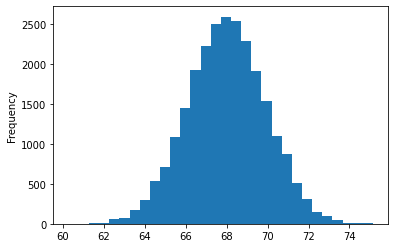

In [ ]:
import matplotlib.pyplot as plt

df["height"].plot(kind = 'hist', bins = 30);

### Fitting a normal distribution to the data

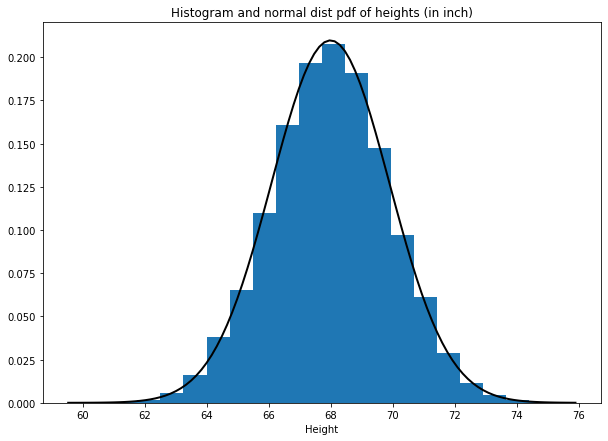

In [ ]:
import numpy as np
import scipy.stats as stats

x = df["height"]

plt.figure(figsize = (10, 7))
plt.hist(x, bins = 20, density = True, label = 'histogram');

xmin, xmax = plt.xlim()

pts = np.linspace(xmin, xmax, 100)
mu, sigma = np.mean(x), np.std(x)

y = stats.norm.pdf(pts, mu, sigma)

plt.plot(pts, y, c = 'k', linewidth=2,  label = 'normal_dist')

plt.title("Histogram and normal dist pdf of heights (in inch)")
plt.xlabel("Height")
plt.show();

### Sample statistics v/s population statistics

In reality we never have population data. We just have samples and based on that we *estimate* statistics

Population mean $$\mu = \frac{∑_{i = 1}^{N}X_{i}}{N} $$
Population variance $$var(X) = \frac{∑_{i = 1}^{N}(X_{i} - \mu) ^2}{N} $$
Population standard deviation $$std(X) = \sqrt{var(X)} $$

But since we almost never have population data, we estimate these using sample data

Sample mean $$\bar{x} = \frac{∑_{i = 1}^{N}X_{i}}{N}$$
Sample variance $$var(x) = \frac{∑_{i = 1}^{N}(X_{i} - \bar{x} ) ^2}{N-1} $$
Sample standard deviation $$std(x) = \sqrt{var(X)}$$

🔑 Note: The division in sample variance is by `N-1` and not `N`. This is to avoid underestimating the population varaince

We'll do this exercise with following dataset of 25000 points. Consider these 25000 points as population and caculate population statistics using these. Then take random samples say 10, 30, 100 and 1000 and estimate sample statistics

📓: Why is sample variance underestimated when dividing by `N`?

Consider following equation: 
$$\frac{∑_{i = 1}^{N}(X_{i} - \mathbf{v} ) ^2}{N-1} $$

If we minimize this equation wrt `v` then minima occurs at $v = \bar{x} $. When we calculate this formula for $v = \bar{x}$ and $v = \mu$ then the value for $v = \bar{x}$ is always less. So to compensate this, we divide by `N-1` while taking sample variance

In [ ]:
x.shape, x[:5], x[-5:]

((25000,), 0    65.78331
 1    71.51521
 2    69.39874
 3    68.21660
 4    67.78781
 Name: height, dtype: float64, 24995    69.50215
 24996    64.54826
 24997    64.69855
 24998    67.52918
 24999    68.87761
 Name: height, dtype: float64)

### Population mean, variance and standard deviation

In [ ]:
m = np.mean(x)
v = np.var(x)
s = np.sqrt(v)
print(f"Population mean: {m:.2f}, variance: {v:.2f} and standard deviation: {s:.2f}")

Population mean: 67.99, variance: 3.62 and standard deviation: 1.90


### Estimate sample mean, variance and standard deviation

In [ ]:
x1 = np.random.choice(x, 10)
x2 = np.random.choice(x, 30)
x3 = np.random.choice(x, 100)
x4 = np.random.choice(x, 1000)

len(x1), len(x2), len(x3), len(x4)

(10, 30, 100, 1000)

In [ ]:
# Sample means - can calculate in same way as population means
m1 = np.mean(x1)
m2 = np.mean(x2)
m3 = np.mean(x3)
m4 = np.mean(x4)

## Sample variance
v1 = np.sum(np.square(x1 - m1)) / (len(x1) - 1)
v2 = np.sum(np.square(x2 - m2)) / (len(x2) - 1)
v3 = np.sum(np.square(x3 - m3)) / (len(x3) - 1)
v4 = np.sum(np.square(x4 - m4)) / (len(x4) - 1)

## Sample standard deviation
s1 = np.sqrt(v1)
s2 = np.sqrt(v2)
s3 = np.sqrt(v3)
s4 = np.sqrt(v4)

print(f"""
\t mean \t var \t std \n
x1 \t {m1:.2f} \t {v1:.2f} \t {s1:.2f} \n
x2 \t {m2:.2f} \t {v2:.2f} \t {s2:.2f} \n
x3 \t {m3:.2f} \t {v3:.2f} \t {s3:.2f} \n
x4 \t {m4:.2f} \t {v4:.2f} \t {s4:.2f} \n
-----------------------------------------
x \t {m:.2f} \t {v:.2f} \t {s:.2f}
""")


	 mean 	 var 	 std 

x1 	 66.91 	 3.15 	 1.78 

x2 	 68.14 	 3.41 	 1.85 

x3 	 68.04 	 3.69 	 1.92 

x4 	 67.97 	 3.75 	 1.94 

-----------------------------------------
x 	 67.99 	 3.62 	 1.90



### Understanding `NULL`, `Alternate` hypothesis and understanding `p-value`

Lets create and experiment where we display some items to the users. The user might click the item or not. We denote these as

if user clicks = 1

if not clicks = 0

we define CTR (Click Through Rate) as #clicks / total_items_displayed

Now we have a certains CTR in our production systems say 0.05 CTR. Now we do an experiment (say change ad slot positions or do some other modification) then the CTR might change. We want to know if the new metric occured due to a random chance or is it statistical significance. 

Let's understand all this through a step by step example

* Step 1: Create a hypothesis
* Step 2: Do the experiment and track the metrics
* Step 3: Compare the metric with the hypothesis in Step 1
* Step 4: If the data gives strong evidence that there is a difference if initial hypothesis and experiment than we reject the initial hypothise
* Step 5: If the data doesn't give us strong evidence that there is a difference in initial hypothese and experiment then we fail to reject the initial hypothesis 

We start by telling that there is no difference between experiment A (initial or current production or `control`) and experiment B (`feature` or `variant`). This is called **`NULL hypothesis`** (Step 1)

If we repeat the experiment on many people and conclude that here is a difference and that the difference didn't occured by random chance then we **`reject the NULL hypothesis`** 

Alternatively if we repeaat the experiment and coclude that there is a difference but we are not not convinced about the results, i.e. the result might also occur due to random chance, then we **`fail to reject`** the NULL hypothesis

To decide whether to reject of fail to reject the NULL hypothesis, we run the data through **`Statistical Test`**. Things required by statistical test

1. Data
2. NULL Hypothesis
3. Alternate Hypothesis

In our case **`Alternative Hypothesis`** is just the opposite of NULL hypothesis, i.e. there is a difference between experiment A and experiment B.

Statistical Test:

NULL Hypothesis: From the overall data of experiment A and experiment B, get the overall CTR. And calculate distances between overall mean and all CTRs (residuals). This is called NULL Hypothesis.

Alternate Hypothesis: From the individual data of experiment A and experiment B, get 2 separate CTRs. And calculated residuals separately for A and B. This is called Alternative Hypothesis.

If the sum of residuals with alternative hypothesis are much shorter than the sum of residuals with NULL hypothesis then we reject the NULL hypothesis because in this case having 2 separate CTRs make much more sense. 

Otherwise if the difference between sum of residual of NULL hypothesis and sum of residuals of alternative hypothesis are similar then we fail to reject the NULL hypothesis because in this case having a single CTR makes sense. Similar to saying that if we use 2 CTRs then it overfits the data and it makes sense to use one overall CTR

### `p-Values`
In above we calculated residuals (distances from mean CTRs) for NULL and alternative hypothesis. Suppose if there is some difference. We want to understand it this difference occured by random chance or not. If `p-Value` is small then we say that there is no difference in experiement A and B and we fail to reject the NULL hypothesis. Generally used threshold is 0.05. If p-value is less than 0.05 then we say that if we do this experiment several times than only 5% of the times we would end up with wrong decisions

p-Value only tells us that whether we should reject or fail to reject the null hypothesis. It doesn't tell us *how much different* are NULL hypothesis and alternative hypothesis are?

### Calculating p-values